<a href="https://colab.research.google.com/github/Atharv-1905/Deep-Learning/blob/main/DL_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

In [128]:
data = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
display(data.head(10))

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [129]:
# Ensure column names are stripped of whitespace to avoid KeyError
data.columns = data.columns.str.strip()

# Convert 'Chance of Admit' to a binary classification target (0 or 1)
# if the chance is less than 0.6, it becomes 0, otherwise it becomes 1.
data['Chance of Admit'] = np.where(data['Chance of Admit'] < 0.75, 0, 1)


In [130]:
display(data.head(10))

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
5,6,330,115,5,4.5,3.0,9.34,1,1
6,7,321,109,3,3.0,4.0,8.20,1,1
7,8,308,101,2,3.0,4.0,7.90,0,0
8,9,302,102,1,2.0,1.5,8.00,0,0
9,10,323,108,3,3.5,3.0,8.60,0,0


In [131]:
count_0= 0
count_1 = 0
for i in data['Chance of Admit']:
  if(i == 0):
    count_0 += 1
  else:
    count_1 += 1
print(count_0)
print(count_1)

282
218


In [132]:
data.columns = data.columns.str.strip()
X = data.drop(['Serial No.', 'Chance of Admit'], axis=1)
y = data['Chance of Admit']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 35.3 KB


In [136]:
num_col = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [137]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(num_len,)), # Corrected input shape
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'), # Output between 0 and 1 for 'Chance of Admit'
])

num_transformer = Pipeline(steps=[
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_transformer, num_col)
    ]
)

model.compile(optimizer='adam',
              loss='mean_squared_error', # Loss for regression
              metrics=['mean_absolute_error']) # Metric for regression


main_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model )
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [138]:
main_pipeline.fit(X_train, y_train)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1702 - mean_absolute_error: 0.3959


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('inputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['GRE Score', 'TOEFL Score',
                                                   'University Rating', 'SOP',
                                                   'LOR', 'CGPA',
                                                   'Research'])])),
                ('model', <Sequential name=sequential_6, built=True>)])

In [144]:
y_pred = main_pipeline.predict(X_test)
# Convert continuous predictions to binary classes based on a threshold
y_pred_class = (y_pred > 0.75).astype(int)

# Display the first few predicted classes for verification
print(y_pred_class[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[1]
 [0]
 [0]
 [0]
 [0]]


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [146]:
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy}')

Accuracy: 0.91


In [140]:
import seaborn as sns


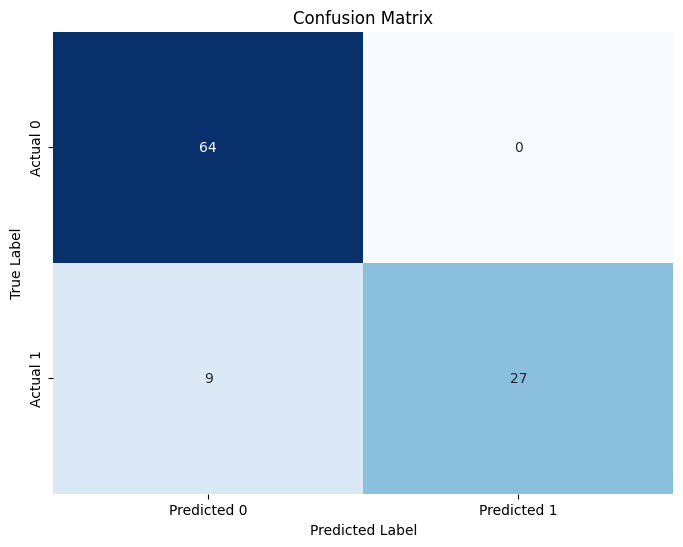

In [148]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()